# Mobile Data Speed Analysis for August 2021 in India

### Dataset: All India Crowdsourced Mobile Data Speed Measurement for August 2021
Dataset source [URL](https://data.gov.in/resource/all-india-crowdsourced-mobile-data-speed-measurement-august-2021)
  
This catalog provides Crowd sourced Mobile Data Speeds and other network information measured using TRAI MySpeed App.

Insights you will get from this notebook.
1. State wise speed analysis
2. Providers state wise analysis
3. Predict the speed based on the provider and the signal_strength

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('August_MySpeed_2021.csv')

# Dataset explanation
1. **operator** -> Sim card operator (e.g. Airtel, Jio, etc.)
2. **technology** -> Which technology was used while speed testing
3. **Download** -> What can kind of speed test was it? Download or Upload
4. **speed_kbps** -> Speed in a Kbps
5. **signal strength** -> Signal strength while testing
6. **lsa** -> State where test was performed

In [3]:
df.head()

,operator,technology,download,speed_kbps,signal_strength,lsa
0,AIRTEL,4G,upload,40,na,Bihar
1,AIRTEL,4G,upload,251,-104,Bihar
2,AIRTEL,4G,upload,693,-107,NaN
3,AIRTEL,4G,upload,812,-105,Bihar
4,AIRTEL,4G,upload,770,-87,Bihar


In [4]:
df.shape

(290496, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290496 entries, 0 to 290495
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   operator         290496 non-null  object
 1   technology       290496 non-null  object
 2   download         290496 non-null  object
 3   speed_kbps       290496 non-null  int64 
 4   signal_strength  290496 non-null  object
 5   lsa              247268 non-null  object
dtypes: int64(1), object(5)
memory usage: 13.3+ MB


In [6]:
df.isnull().sum()

operator               0
technology             0
download               0
speed_kbps             0
signal_strength        0
lsa                43228
dtype: int64

Original Dataset is of the shape (290496, 6).

By Observations:
1. We have the NaN values in lsa
2. Also we can observe the na value in signal_strength but as the  signal_strength type was object it didn't showed in NaN values

# Data Cleaning

1. Remove the NaN values
2. convert the `download`, `signal_strength`, `technology` to numerical value

In [7]:
df = df.dropna()

In [8]:
df

,operator,technology,download,speed_kbps,signal_strength,lsa
0,AIRTEL,4G,upload,40,na,Bihar
1,AIRTEL,4G,upload,251,-104,Bihar
3,AIRTEL,4G,upload,812,-105,Bihar
4,AIRTEL,4G,upload,770,-87,Bihar
5,AIRTEL,4G,upload,703,-107,Bihar
...,...,...,...,...,...,...
290491,Vi India,4G,upload,6591,-75,Punjab
290492,AIRTEL,4G,download,2080,-111,Orissa
290493,AIRTEL,4G,download,10819,-107,Orissa
290494,AIRTEL,4G,download,444,na,Orissa


After removing the NaN values signal_strength still has the `na` value

In [9]:
df['signal_strength'].value_counts()

na     41583
-67    14402
-69     8545
-65     7549
-66     6525
       ...  
-58       36
-56       13
-54       12
-50       11
-52        8
Name: signal_strength, Length: 64, dtype: int64

Almost the `41583` values has `na` value

In [10]:
df['signal_strength'].unique()

array(['na', '-104', '-105', '-87', '-107', '-57', '-111', '-108', '-62',
       '-64', '-65', '-97', '-103', '-82', '-77', '-109', '-69', '-72',
       '-74', '-112', '-100', '-53', '-63', '-70', '-68', '-89', '-81',
       '-80', '-76', '-78', '-98', '-75', '-73', '-96', '-99', '-83',
       '-93', '-71', '-61', '-67', '-110', '-85', '-66', '-102', '-91',
       '-92', '-106', '-90', '-79', '-101', '-51', '-95', '-55', '-86',
       '-88', '-94', '-84', '-60', '-59', '-58', '-54', '-50', '-56',
       '-52'], dtype=object)

Let's fix the na value by replacing it with NaN value

In [11]:
def fixNa(x):
    if str(x) == 'na':
        return np.nan
    else:
        return x



In [12]:
df['signal_strength'] = df['signal_strength'].apply(fixNa)

In [13]:
df

,operator,technology,download,speed_kbps,signal_strength,lsa
0,AIRTEL,4G,upload,40,NaN,Bihar
1,AIRTEL,4G,upload,251,-104,Bihar
3,AIRTEL,4G,upload,812,-105,Bihar
4,AIRTEL,4G,upload,770,-87,Bihar
5,AIRTEL,4G,upload,703,-107,Bihar
...,...,...,...,...,...,...
290491,Vi India,4G,upload,6591,-75,Punjab
290492,AIRTEL,4G,download,2080,-111,Orissa
290493,AIRTEL,4G,download,10819,-107,Orissa
290494,AIRTEL,4G,download,444,NaN,Orissa


In [14]:
df = df.dropna()
df

,operator,technology,download,speed_kbps,signal_strength,lsa
1,AIRTEL,4G,upload,251,-104,Bihar
3,AIRTEL,4G,upload,812,-105,Bihar
4,AIRTEL,4G,upload,770,-87,Bihar
5,AIRTEL,4G,upload,703,-107,Bihar
6,AIRTEL,4G,upload,138,-105,Bihar
...,...,...,...,...,...,...
290489,Vi India,4G,download,14545,-69,Punjab
290490,Vi India,4G,upload,10992,-79,Punjab
290491,Vi India,4G,upload,6591,-75,Punjab
290492,AIRTEL,4G,download,2080,-111,Orissa


In [15]:
df.isnull().sum()

operator           0
technology         0
download           0
speed_kbps         0
signal_strength    0
lsa                0
dtype: int64

In [16]:
# Convert the Object datatype to int64
df['signal_strength'] = df['signal_strength'].astype('int64')
df['signal_strength'].unique()

/var/folders/px/6zsw73m1337_3ytjc342htzm0000gn/T/ipykernel_45495/4223117840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['signal_strength'] = df['signal_strength'].astype('int64')


array([-104, -105,  -87, -107,  -57, -111, -108,  -62,  -64,  -65,  -97,
       -103,  -82,  -77, -109,  -69,  -72,  -74, -112, -100,  -53,  -63,
        -70,  -68,  -89,  -81,  -80,  -76,  -78,  -98,  -75,  -73,  -96,
        -99,  -83,  -93,  -71,  -61,  -67, -110,  -85,  -66, -102,  -91,
        -92, -106,  -90,  -79, -101,  -51,  -95,  -55,  -86,  -88,  -94,
        -84,  -60,  -59,  -58,  -54,  -50,  -56,  -52])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205685 entries, 1 to 290493
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   operator         205685 non-null  object
 1   technology       205685 non-null  object
 2   download         205685 non-null  object
 3   speed_kbps       205685 non-null  int64 
 4   signal_strength  205685 non-null  int64 
 5   lsa              205685 non-null  object
dtypes: int64(2), object(4)
memory usage: 11.0+ MB


Let's change the technology to int64 

Our dataset has only two technology results 3G and 4G

Now we can replace the technology with 1 for 4G and 0 for 3G 

In [18]:
df['technology'].value_counts()

4G    203047
3G      2638
Name: technology, dtype: int64

([<matplotlib.patches.Wedge at 0x7f9248cc6af0>,
 [Text(-0.0443095109513063, -1.0991072137145022, '4G'),
  Text(0.044309485224845666, 1.0991072147516407, '3G')],
 [Text(-0.02416882415525798, -0.5995130256624556, '98.7%'),
  Text(0.024168810122643086, 0.5995130262281676, '1.3%')])

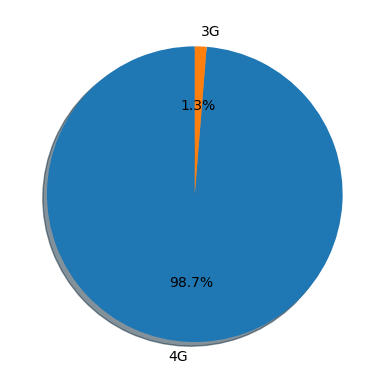

In [19]:
plt.pie(df['technology'].value_counts(), labels = df['technology'].value_counts().index, autopct='%1.1f%%', shadow=True, startangle=90)

From above graph we can clearly see that in current usage more the 98.7% people are using 4G Technology.

In [20]:
def zeroOne(x):
    if x == '4G':
        return 1
    else:
        return 0

In [21]:
df['technology'] = df['technology'].apply(zeroOne)
df

/var/folders/px/6zsw73m1337_3ytjc342htzm0000gn/T/ipykernel_45495/29448403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['technology'] = df['technology'].apply(zeroOne)


,operator,technology,download,speed_kbps,signal_strength,lsa
1,AIRTEL,1,upload,251,-104,Bihar
3,AIRTEL,1,upload,812,-105,Bihar
4,AIRTEL,1,upload,770,-87,Bihar
5,AIRTEL,1,upload,703,-107,Bihar
6,AIRTEL,1,upload,138,-105,Bihar
...,...,...,...,...,...,...
290489,Vi India,1,download,14545,-69,Punjab
290490,Vi India,1,upload,10992,-79,Punjab
290491,Vi India,1,upload,6591,-75,Punjab
290492,AIRTEL,1,download,2080,-111,Orissa


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205685 entries, 1 to 290493
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   operator         205685 non-null  object
 1   technology       205685 non-null  int64 
 2   download         205685 non-null  object
 3   speed_kbps       205685 non-null  int64 
 4   signal_strength  205685 non-null  int64 
 5   lsa              205685 non-null  object
dtypes: int64(3), object(3)
memory usage: 11.0+ MB


Our download column is having the categorical values, Lets change it to numerical values, Here I'm changing the download value with 1 and upload with 0

Similarly, Let's change the download attribute to int64 

Our dataset has only two types of download fields.

Now we can replace the download speeds with 1 for 4G and upload speeds with 0

In [23]:
df['download'].value_counts()

download    103769
upload      101916
Name: download, dtype: int64

In [24]:
def oneZero(a):
    if str(a) == 'download':
        return 1
    else:
        return 0

In [25]:
df['download'] = df['download'].apply(oneZero)
df

/var/folders/px/6zsw73m1337_3ytjc342htzm0000gn/T/ipykernel_45495/3439364519.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['download'] = df['download'].apply(oneZero)


,operator,technology,download,speed_kbps,signal_strength,lsa
1,AIRTEL,1,0,251,-104,Bihar
3,AIRTEL,1,0,812,-105,Bihar
4,AIRTEL,1,0,770,-87,Bihar
5,AIRTEL,1,0,703,-107,Bihar
6,AIRTEL,1,0,138,-105,Bihar
...,...,...,...,...,...,...
290489,Vi India,1,1,14545,-69,Punjab
290490,Vi India,1,0,10992,-79,Punjab
290491,Vi India,1,0,6591,-75,Punjab
290492,AIRTEL,1,1,2080,-111,Orissa


In [26]:
df['download'].value_counts()

1    103769
0    101916
Name: download, dtype: int64

Lets Check the operator based rows

In [27]:
df['operator'].value_counts()

JIO         126667
AIRTEL       43485
Vi India     31740
CELLONE       3793
Name: operator, dtype: int64

Operators visualized on pi chart

([<matplotlib.patches.Wedge at 0x7f927a8653d0>,
 [Text(-1.0279710690084891, -0.39150412677460306, 'JIO'),
  Text(1.0824570437018495, -0.1956699990807298, 'AIRTEL'),
  Text(0.6217038057792765, 0.9074604001715798, 'Vi India'),
  Text(0.06369141254498066, 1.0981545446648322, 'CELLONE')],
 [Text(-0.5607114921864486, -0.2135477055134198, '61.6%'),
  Text(0.5904311147464633, -0.1067290904076708, '21.1%'),
  Text(0.3391111667886963, 0.49497840009358895, '15.4%'),
  Text(0.034740770479080356, 0.5989933879989994, '1.8%')])

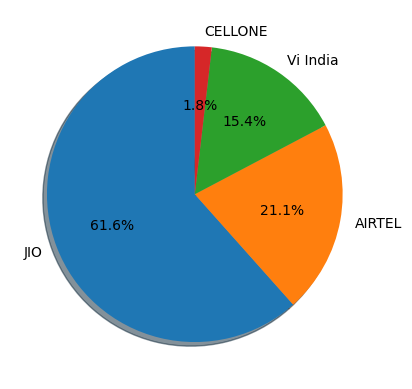

In [28]:
plt.pie(df['operator'].value_counts(), labels = df['operator'].value_counts().index, autopct='%1.1f%%', shadow=True, startangle=90)

Above chart has both download and upload speeds data, Let's visualize the dataset based on the upload speed and download speed also

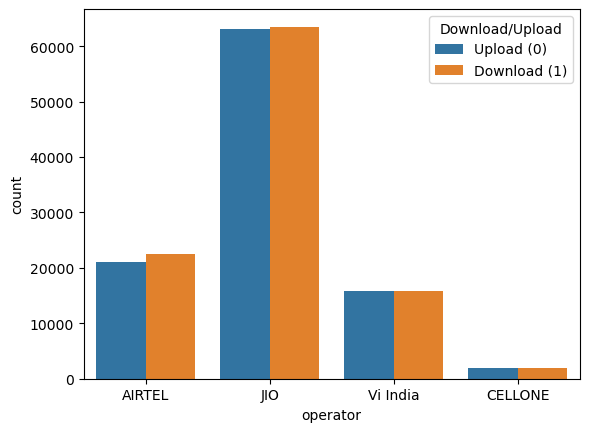

In [29]:
# Python
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the count of '0's and '1's in 'download' for each 'operator'
plot = sns.countplot(x='operator', hue='download', data=df)

# Add custom labels
plot.legend(title='Download/Upload', labels=['Upload (0)', 'Download (1)'])

# Show the plot
plt.show()

Let's create the different data frames for the upload and download speeds 

## Analysis based on download speeds


In [30]:
download_df = df[df['download'] == 1]

In [31]:
download_df

,operator,technology,download,speed_kbps,signal_strength,lsa
7,AIRTEL,1,1,2316,-57,Andhra Pradesh
11,AIRTEL,1,1,723,-111,Andhra Pradesh
13,JIO,1,1,28167,-62,UP West
14,JIO,1,1,39433,-62,UP West
15,JIO,1,1,38477,-62,UP West
...,...,...,...,...,...,...
290486,AIRTEL,1,1,0,-91,Chennai
290488,Vi India,1,1,16563,-77,Punjab
290489,Vi India,1,1,14545,-69,Punjab
290492,AIRTEL,1,1,2080,-111,Orissa


<AxesSubplot:xlabel='speed_kbps'>

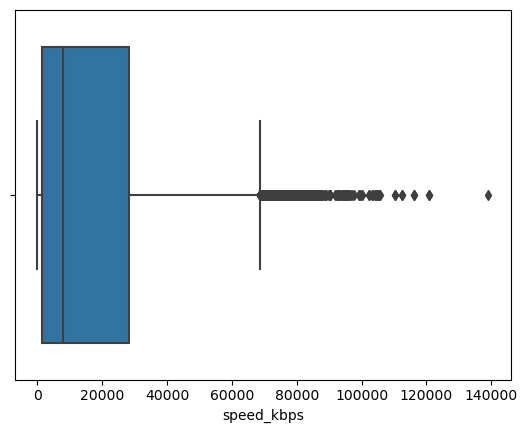

In [32]:
sns.boxplot(x=download_df['speed_kbps'])

In [33]:
# Calculate Q1, Q3 and IQR
Q1 = download_df['speed_kbps'].quantile(0.25)
Q3 = download_df['speed_kbps'].quantile(0.75)
IQR = Q3 - Q1

# Define the range for outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identify the outliers
outliers = download_df[(download_df['speed_kbps'] < lower_limit) | (download_df['speed_kbps'] > upper_limit)]
outliers

,operator,technology,download,speed_kbps,signal_strength,lsa
205,JIO,1,1,78091,-110,Karnataka
234,JIO,1,1,75256,-72,UP East
279,JIO,1,1,71330,-66,Mumbai
315,JIO,1,1,70188,-90,Andhra Pradesh
324,JIO,1,1,68659,-70,Karnataka
...,...,...,...,...,...,...
289125,JIO,1,1,82324,-68,Bihar
289205,JIO,1,1,83609,-66,Andhra Pradesh
289238,JIO,1,1,81657,-67,Karnataka
289497,JIO,1,1,73578,-71,Karnataka


In [34]:
upper_limit

68543.0

In download data frame we have 1331 outliers, After the 68543 Kbps 

In [35]:
# Sort the outliers DataFrame
sorted_outliers = outliers.sort_values('speed_kbps', ascending=False)
sorted_outliers

,operator,technology,download,speed_kbps,signal_strength,lsa
200093,AIRTEL,1,1,139083,-79,Gujarat
218560,JIO,1,1,120929,-97,Maharashtra
120828,JIO,1,1,120929,-97,Maharashtra
227319,Vi India,1,1,116206,-102,UP East
147685,Vi India,1,1,116206,-102,UP East
...,...,...,...,...,...,...
38125,JIO,1,1,68572,-65,UP East
104749,JIO,1,1,68548,-72,Karnataka
44517,JIO,1,1,68548,-72,Karnataka
104752,JIO,1,1,68546,-72,Karnataka


In [36]:
mean_speed = download_df['speed_kbps'].mean()
median_speed = download_df['speed_kbps'].median()

print(f"Mean: {mean_speed}")
print(f"Median: {median_speed}")

Mean: 15667.955497306517
Median: 7986.0


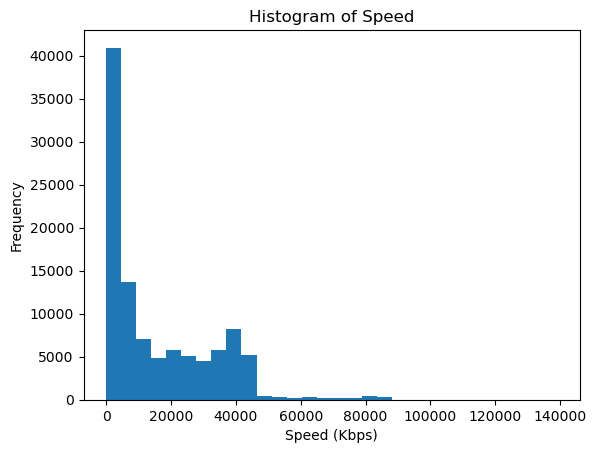

In [37]:
# Plot histogram
plt.hist(download_df['speed_kbps'], bins=30)
plt.xlabel('Speed (Kbps)')
plt.ylabel('Frequency')
plt.title('Histogram of Speed')
plt.show()


By observing the outliers, we have data speeds more than 100 Mbps also, which is above the theoretical value.

As per the wikipedia website, Theoretically, 4G can achieve speeds of up to 100 megabits per second (Mbit/s) for high mobility communication

By in our dataset we have the values more than 100 Mbps also. We have to drop those values. also considering the reviews I've read on google and other websites, I've decided to drop all the outliers considering the real life users experience.

In [42]:
clear_download_df = download_df[download_df['speed_kbps'] < upper_limit]
clear_download_df

,operator,technology,download,speed_kbps,signal_strength,lsa
7,AIRTEL,1,1,2316,-57,Andhra Pradesh
11,AIRTEL,1,1,723,-111,Andhra Pradesh
13,JIO,1,1,28167,-62,UP West
14,JIO,1,1,39433,-62,UP West
15,JIO,1,1,38477,-62,UP West
...,...,...,...,...,...,...
290486,AIRTEL,1,1,0,-91,Chennai
290488,Vi India,1,1,16563,-77,Punjab
290489,Vi India,1,1,14545,-69,Punjab
290492,AIRTEL,1,1,2080,-111,Orissa


# State wise Download Speed Analysis

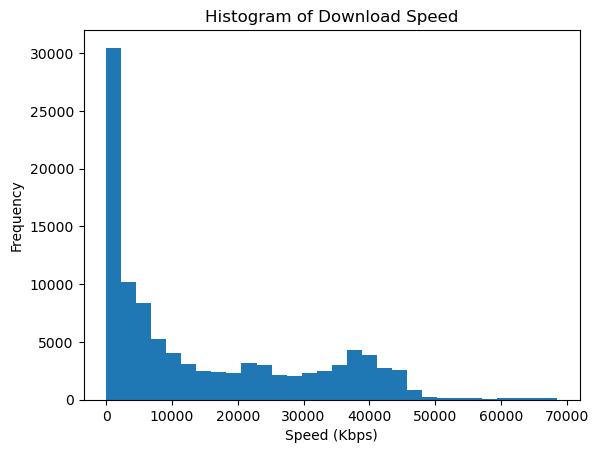

In [43]:
plt.hist(clear_download_df['speed_kbps'], bins=30)
plt.xlabel('Speed (Kbps)')
plt.ylabel('Frequency')
plt.title('Histogram of Download Speed')
plt.show()

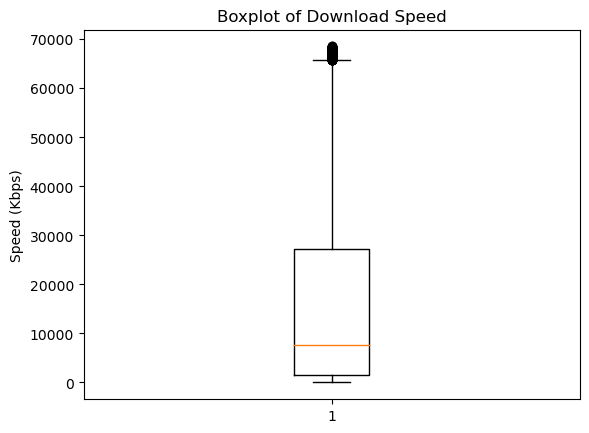

In [44]:
plt.boxplot(clear_download_df['speed_kbps'])
plt.ylabel('Speed (Kbps)')
plt.title('Boxplot of Download Speed')
plt.show()

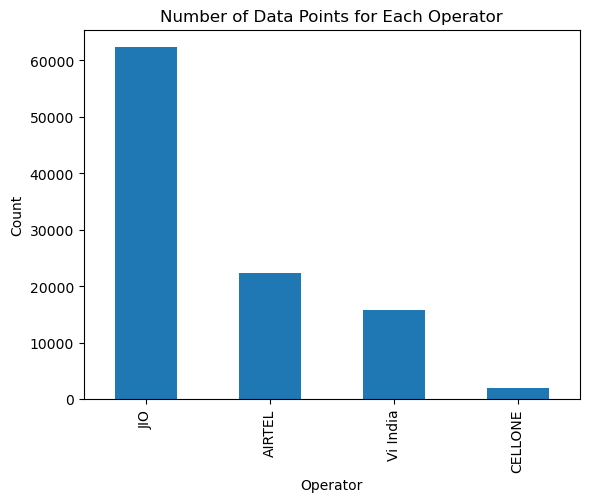

In [45]:
clear_download_df['operator'].value_counts().plot(kind='bar')
plt.xlabel('Operator')
plt.ylabel('Count')
plt.title('Number of Data Points for Each Operator')
plt.show()

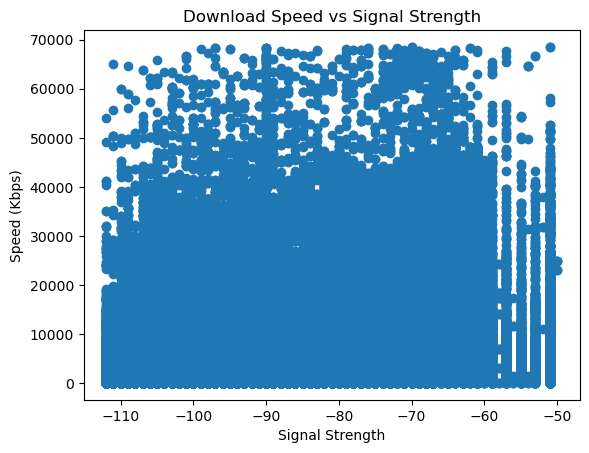

In [46]:
plt.scatter(clear_download_df['signal_strength'], clear_download_df['speed_kbps'])
plt.xlabel('Signal Strength')
plt.ylabel('Speed (Kbps)')
plt.title('Download Speed vs Signal Strength')
plt.show()

In [47]:
operator_ranking = clear_download_df.groupby('operator')['speed_kbps'].mean().sort_values(ascending=False)
operator_ranking

operator
JIO         19985.829313
Vi India     8486.420519
AIRTEL       6057.380697
CELLONE      2051.675591
Name: speed_kbps, dtype: float64

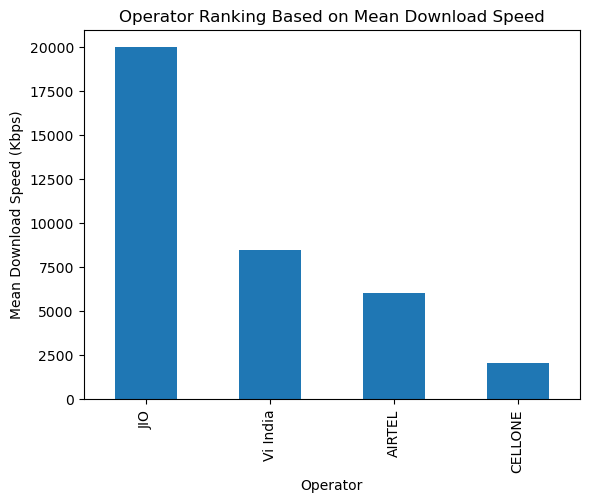

In [49]:
operator_ranking.plot(kind='bar')
plt.xlabel('Operator')
plt.ylabel('Mean Download Speed (Kbps)')
plt.title('Operator Ranking Based on Mean Download Speed')
plt.show()

In [51]:
state_operator_ranking = clear_download_df.groupby(['lsa', 'operator'])['speed_kbps'].mean().sort_values(ascending=False)
state_operator_ranking

lsa             operator
Gujarat         JIO         27232.874170
UP West         JIO         26890.161476
Rajasthan       JIO         26010.317681
Kolkata         JIO         25990.014921
Orissa          JIO         25341.347124
                                ...     
Andhra Pradesh  CELLONE      1577.282477
Kerala          CELLONE      1330.039216
Mumbai          CELLONE      1318.333333
Bihar           CELLONE      1047.166667
UP East         CELLONE        40.000000
Name: speed_kbps, Length: 79, dtype: float64

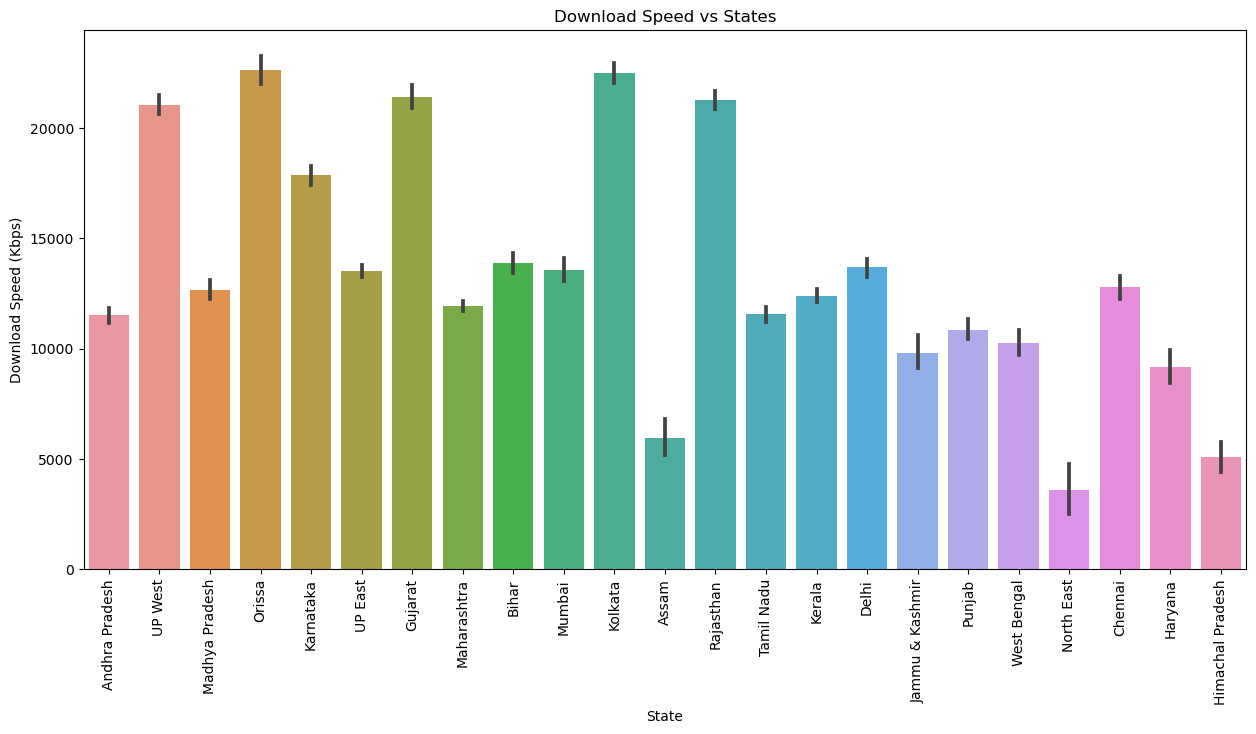

In [61]:
# Download speed vs States
plt.figure(figsize=(15, 7))
sns.barplot(x='lsa', y='speed_kbps', data=clear_download_df)
plt.xlabel('State')
plt.ylabel('Download Speed (Kbps)')
plt.title('Download Speed vs States')
plt.xticks(rotation=90)
plt.show()


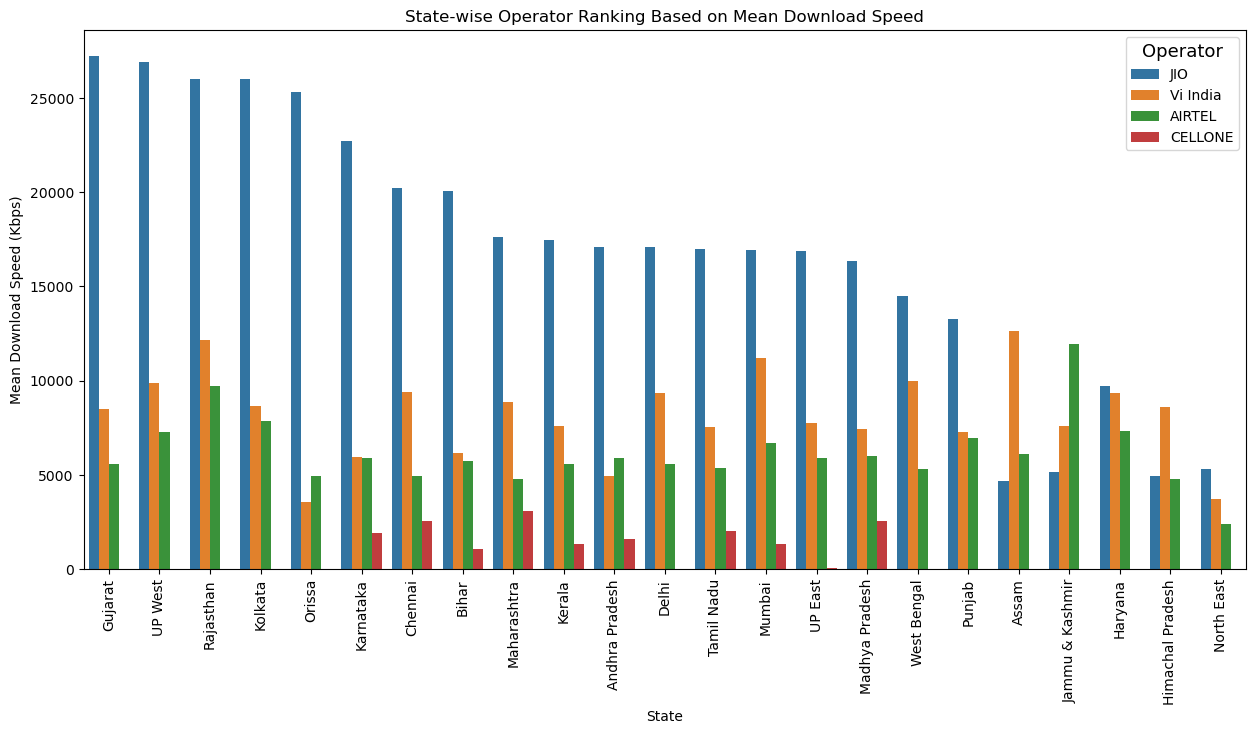

In [59]:
# Convert the Series to a DataFrame and reset the index
new_df = state_operator_ranking.to_frame().reset_index()

# Select the top N states
top_states = new_df['lsa'].value_counts().index[:] 
new_df = new_df[new_df['lsa'].isin(top_states)]

# Create the grouped bar plot
plt.figure(figsize=(15, 7))
sns.barplot(x='lsa', y='speed_kbps', hue='operator', data=new_df, ci=None)
plt.xlabel('State')
plt.ylabel('Mean Download Speed (Kbps)')
plt.title('State-wise Operator Ranking Based on Mean Download Speed')
plt.legend(title='Operator', title_fontsize='13', loc='upper right')
plt.xticks(rotation=90)
plt.show()

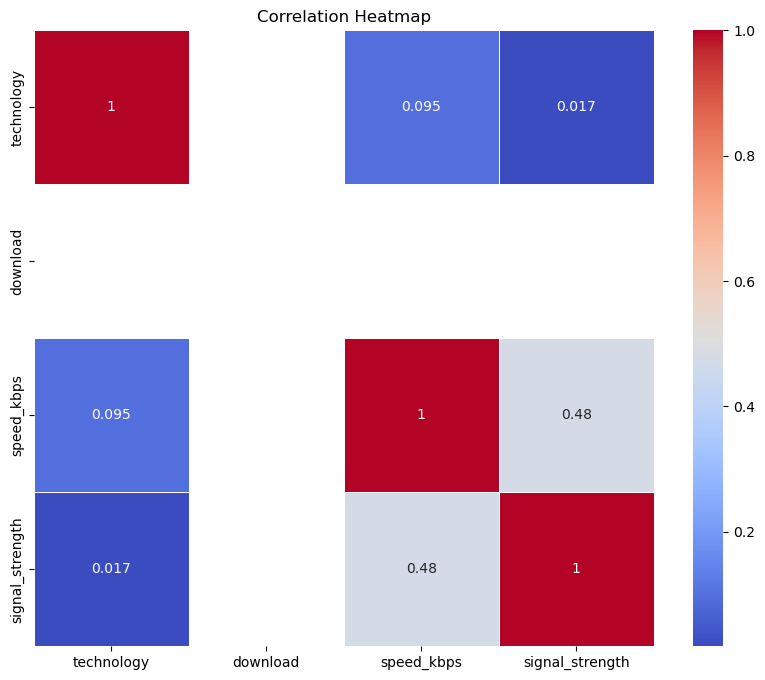

In [48]:
# Calculate the correlation matrix
correlation_matrix = clear_download_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

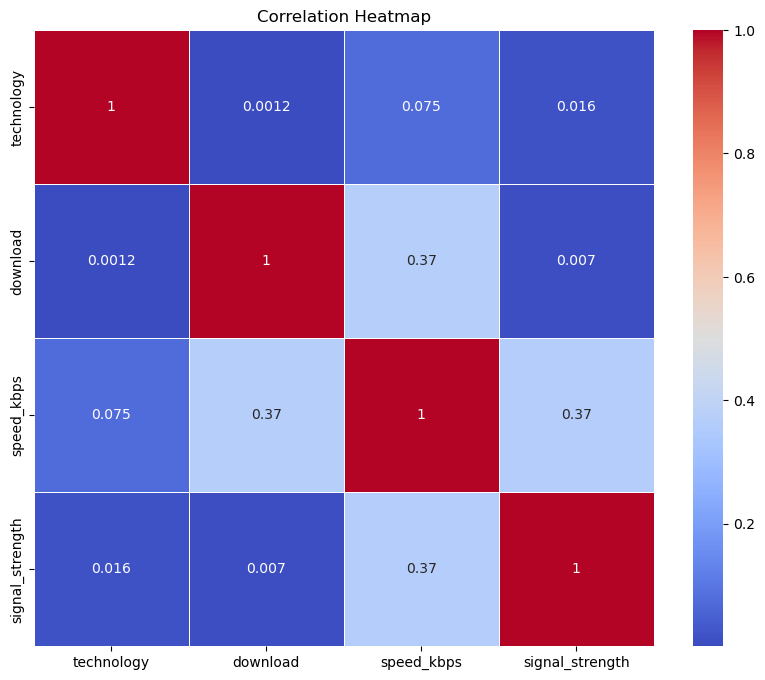

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
correlation_matrix = df.corr()  # Calculate the correlation matrix

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [39]:
df['lsa'].value_counts()

Maharashtra         23287
Kerala              18601
UP East             18369
Tamil Nadu          14435
Rajasthan           14008
Andhra Pradesh      13518
UP West             12750
Karnataka           11722
Gujarat             10595
Delhi                9713
Madhya Pradesh       9298
Bihar                8075
Kolkata              7815
Mumbai               5981
Orissa               5961
Punjab               5882
Chennai              5363
West Bengal          3784
Haryana              2196
Jammu & Kashmir      1834
Himachal Pradesh     1195
Assam                1048
North East            255
Name: lsa, dtype: int64

In [40]:
cor = df.corr()

In [41]:
cor

,technology,download,speed_kbps,signal_strength
technology,1.000000,0.001200,0.075193,0.015908
download,0.001200,1.000000,0.369643,0.006951
speed_kbps,0.075193,0.369643,1.000000,0.367597
signal_strength,0.015908,0.006951,0.367597,1.000000
